In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [6]:
df.nunique()

,0
country,167
child_mort,139
exports,147
health,147
imports,151
income,156
inflation,156
life_expec,127
total_fer,138
gdpp,157


<Axes: >

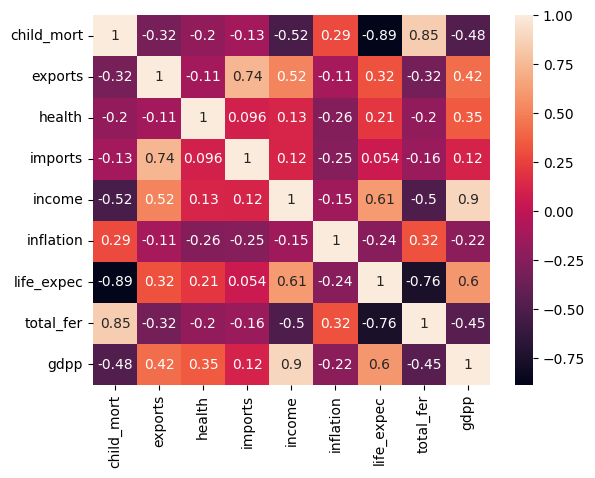

In [8]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

sns.heatmap(df[num_col].corr(),annot = True)

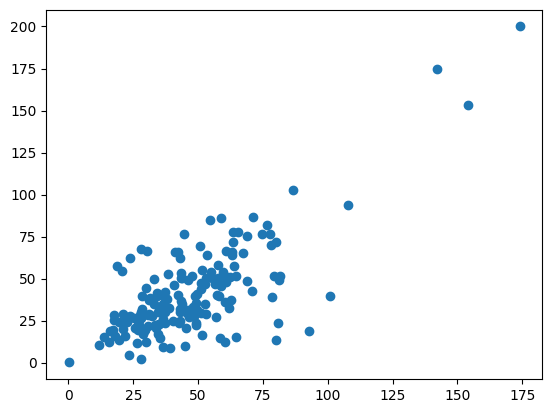

In [11]:
plt.scatter(df['imports'],df['exports'])

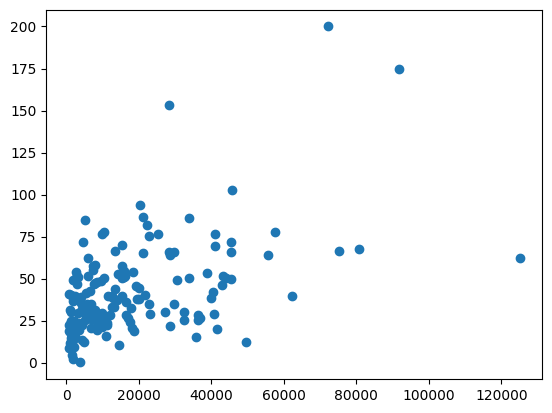

In [12]:
plt.scatter(df['income'],df['exports'])

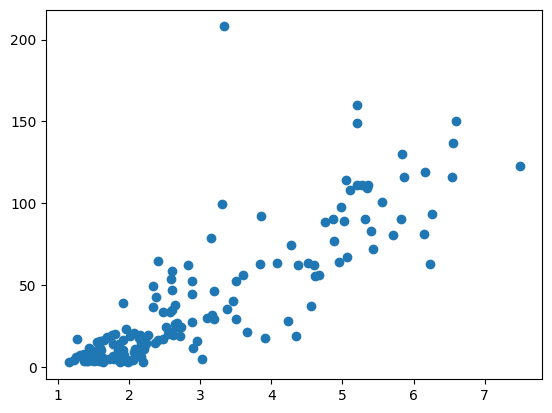

In [13]:
plt.scatter(df['total_fer'],df['child_mort'])

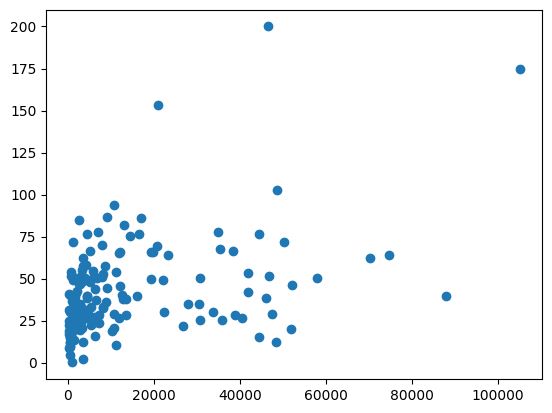

In [16]:
plt.scatter(df['gdpp'],df['exports'])

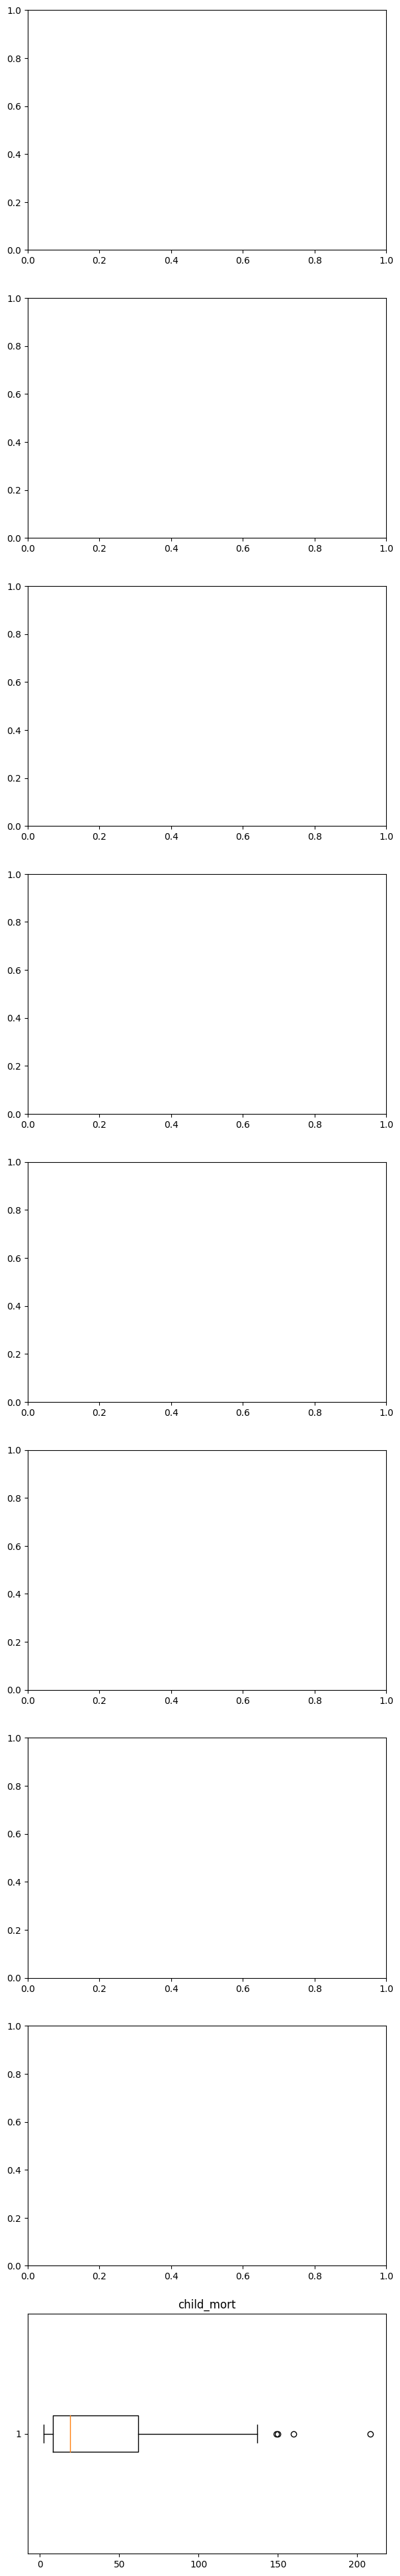

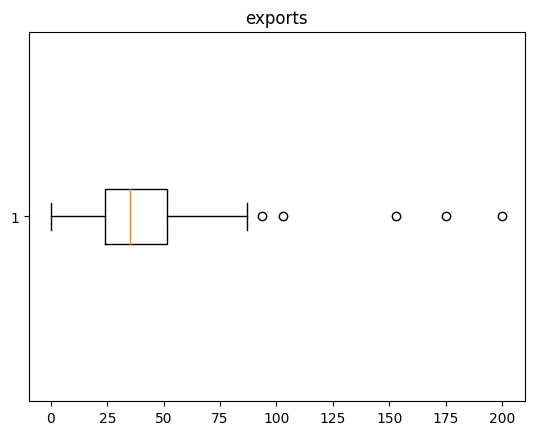

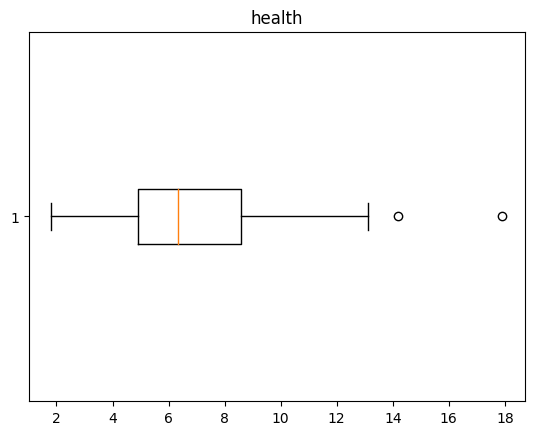

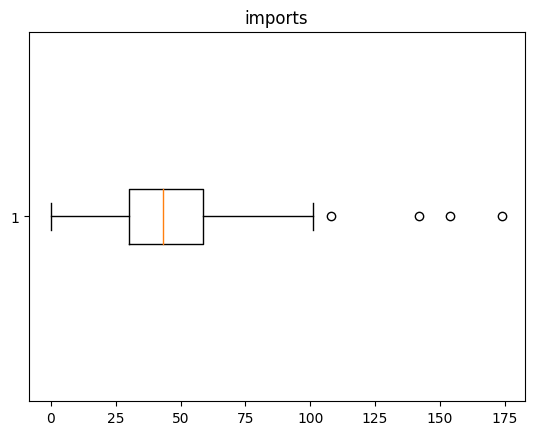

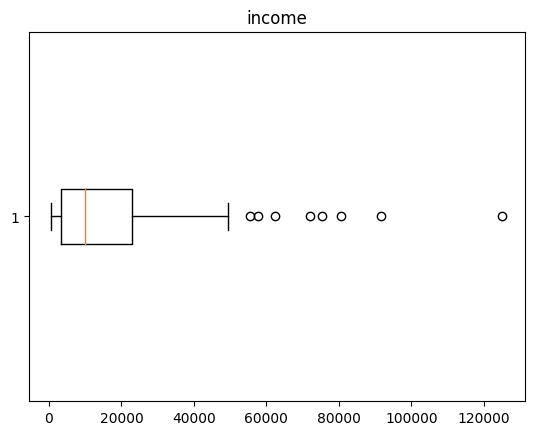

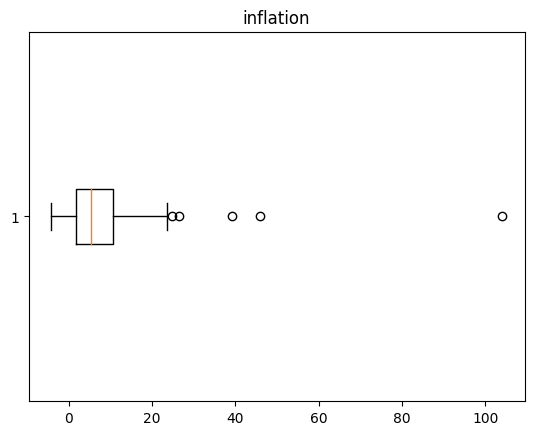

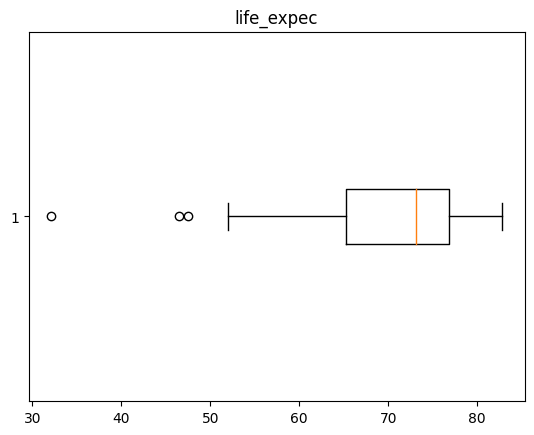

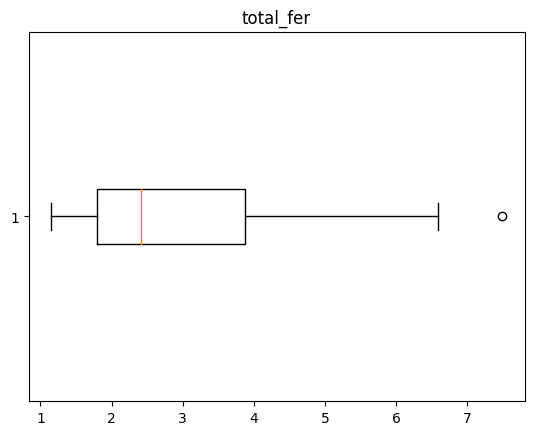

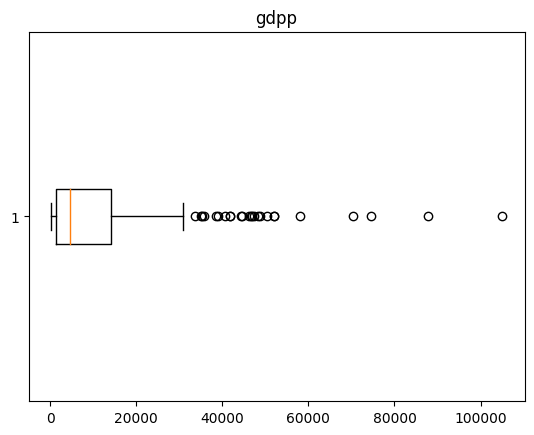

In [17]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df[i],vert = False)
  plt.show()

In [23]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col:
  df[col] = encoder.fit_transform(df[col])

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df)

scaled_pd = pd.DataFrame(scaled,columns = df.columns)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(scaled_pd)

In [30]:
X_pca_pd = pd.DataFrame(X_pca,columns = ['P1','P2'])
X_pca_pd.head()

,P1,P2
0,0.634035,-0.444333
1,-0.121177,-0.513611
2,0.032566,-0.491803
3,0.683617,-0.418896
4,-0.164935,-0.490416


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 4)

labels = kmeans.fit_predict(X_pca)

print(silhouette_score(X_pca,labels))

0.39676804944695815


In [35]:
from sklearn.cluster import  AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 4)

y = agg.fit_predict(X_pca)

print(silhouette_score(X_pca,y))

0.32861852731637964
